## Task 1 - Data Analysis and Preprocessing
 Handle Missing Values
 Impute or drop missing values
 Data Cleaning
 Remove duplicates

 Correct data types
 Exploratory Data Analysis (EDA)
  Univariate analysis
 Bivariate analysis


 Merge Datasets for Geolocation Analysis
  Convert IP addresses to integer format
Merge Fraud_Data.csv with IpAddress_to_Country.csv

 Feature Engineering
Transaction frequency and velocity for Fraud_Data.csv
 Time-Based features for Fraud_Data.csv
  hour_of _day
  day_of_week
 Normalization and Scaling
  Encode Categorical Features


In [1]:
import sys
from data_analysis_and_preprocessing import load_data
from data_analysis_and_preprocessing import univariate_visualize_fraud
from data_analysis_and_preprocessing import univariate_visualize_credit
from data_analysis_and_preprocessing import bivarate
from data_analysis_and_preprocessing import per
from data_analysis_and_preprocessing import standard_and_normalize
from data_analysis_and_preprocessing import check_normality_and_standardize
from data_analysis_and_preprocessing import normalize_and_standard
import pandas as pd


<Figure size 640x480 with 0 Axes>

In [2]:
Fraud_Data=load_data(r'C:\Users\ASUS VIVO\Desktop\e-commerce\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\data\Fraud_Data.csv')
IpAddress_to_Country=load_data(r'C:\Users\ASUS VIVO\Desktop\e-commerce\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\data\IpAddress_to_Country.csv')
creditcard=load_data(r'C:\Users\ASUS VIVO\Desktop\e-commerce\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\data\creditcard.csv')

check missing values

In [3]:
fraud_null_sum=Fraud_Data.isnull().sum().sum()
IpAddress_to_Country_null_sum=IpAddress_to_Country.isnull().sum().sum()
creditcard_null_sum=creditcard.isnull().sum().sum()
print(f'The null value for Fraud data is: {fraud_null_sum}')
print(f'The null value for IpAddress_to_Country is: {IpAddress_to_Country_null_sum}')
print(f'The null value for creditcard is: {creditcard_null_sum}')


The null value for Fraud data is: 0
The null value for IpAddress_to_Country is: 0
The null value for creditcard is: 0


check duplicate values

In [4]:
print(f'{Fraud_Data[Fraud_Data.duplicated()=='True']} for duplicate values')
print(f'{IpAddress_to_Country[IpAddress_to_Country.duplicated()=='True']} for duplicate values')
print(f'{creditcard[creditcard.duplicated()=='True']} for duplicate values')


Empty DataFrame
Columns: [user_id, signup_time, purchase_time, purchase_value, device_id, source, browser, sex, age, ip_address, class]
Index: [] for duplicate values
Empty DataFrame
Columns: [lower_bound_ip_address, upper_bound_ip_address, country]
Index: [] for duplicate values
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns] for duplicate values


correcting data types

In [5]:
print(Fraud_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None


In [6]:
print(IpAddress_to_Country.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


In [7]:
print(creditcard.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

signup and purchase time should be in time format

In [8]:
list=['signup_time' ,'purchase_time']
for column in list:
    Fraud_Data[column]=pd.to_datetime(Fraud_Data[column])

In [9]:
Fraud_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


univarate analyis

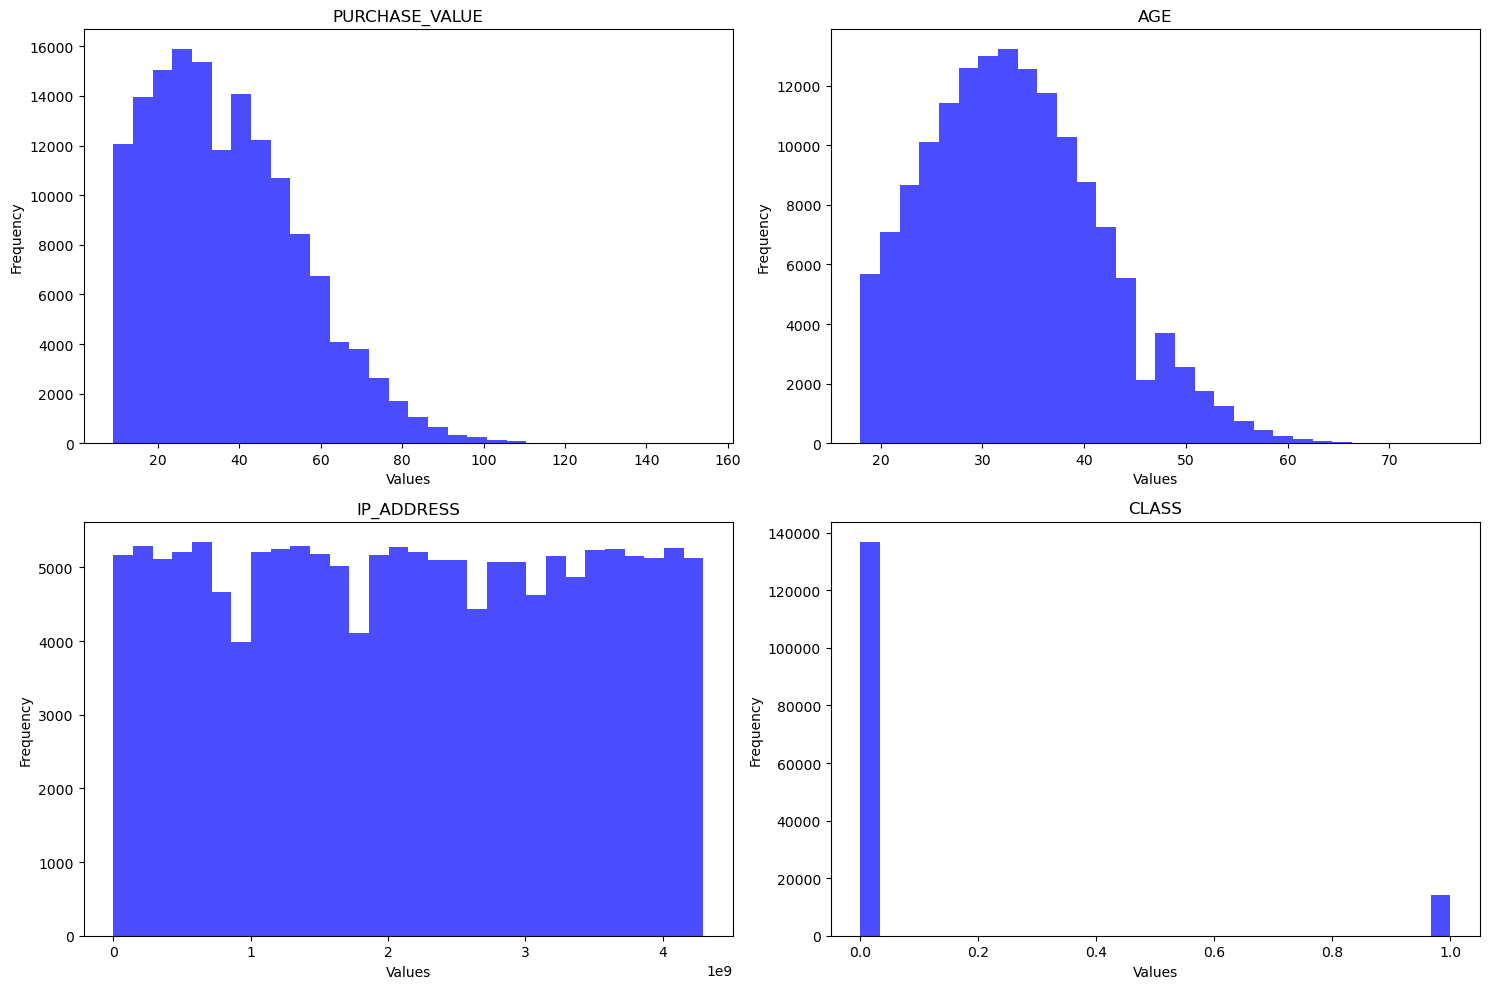

In [10]:
univariate_visualize_fraud(Fraud_Data)

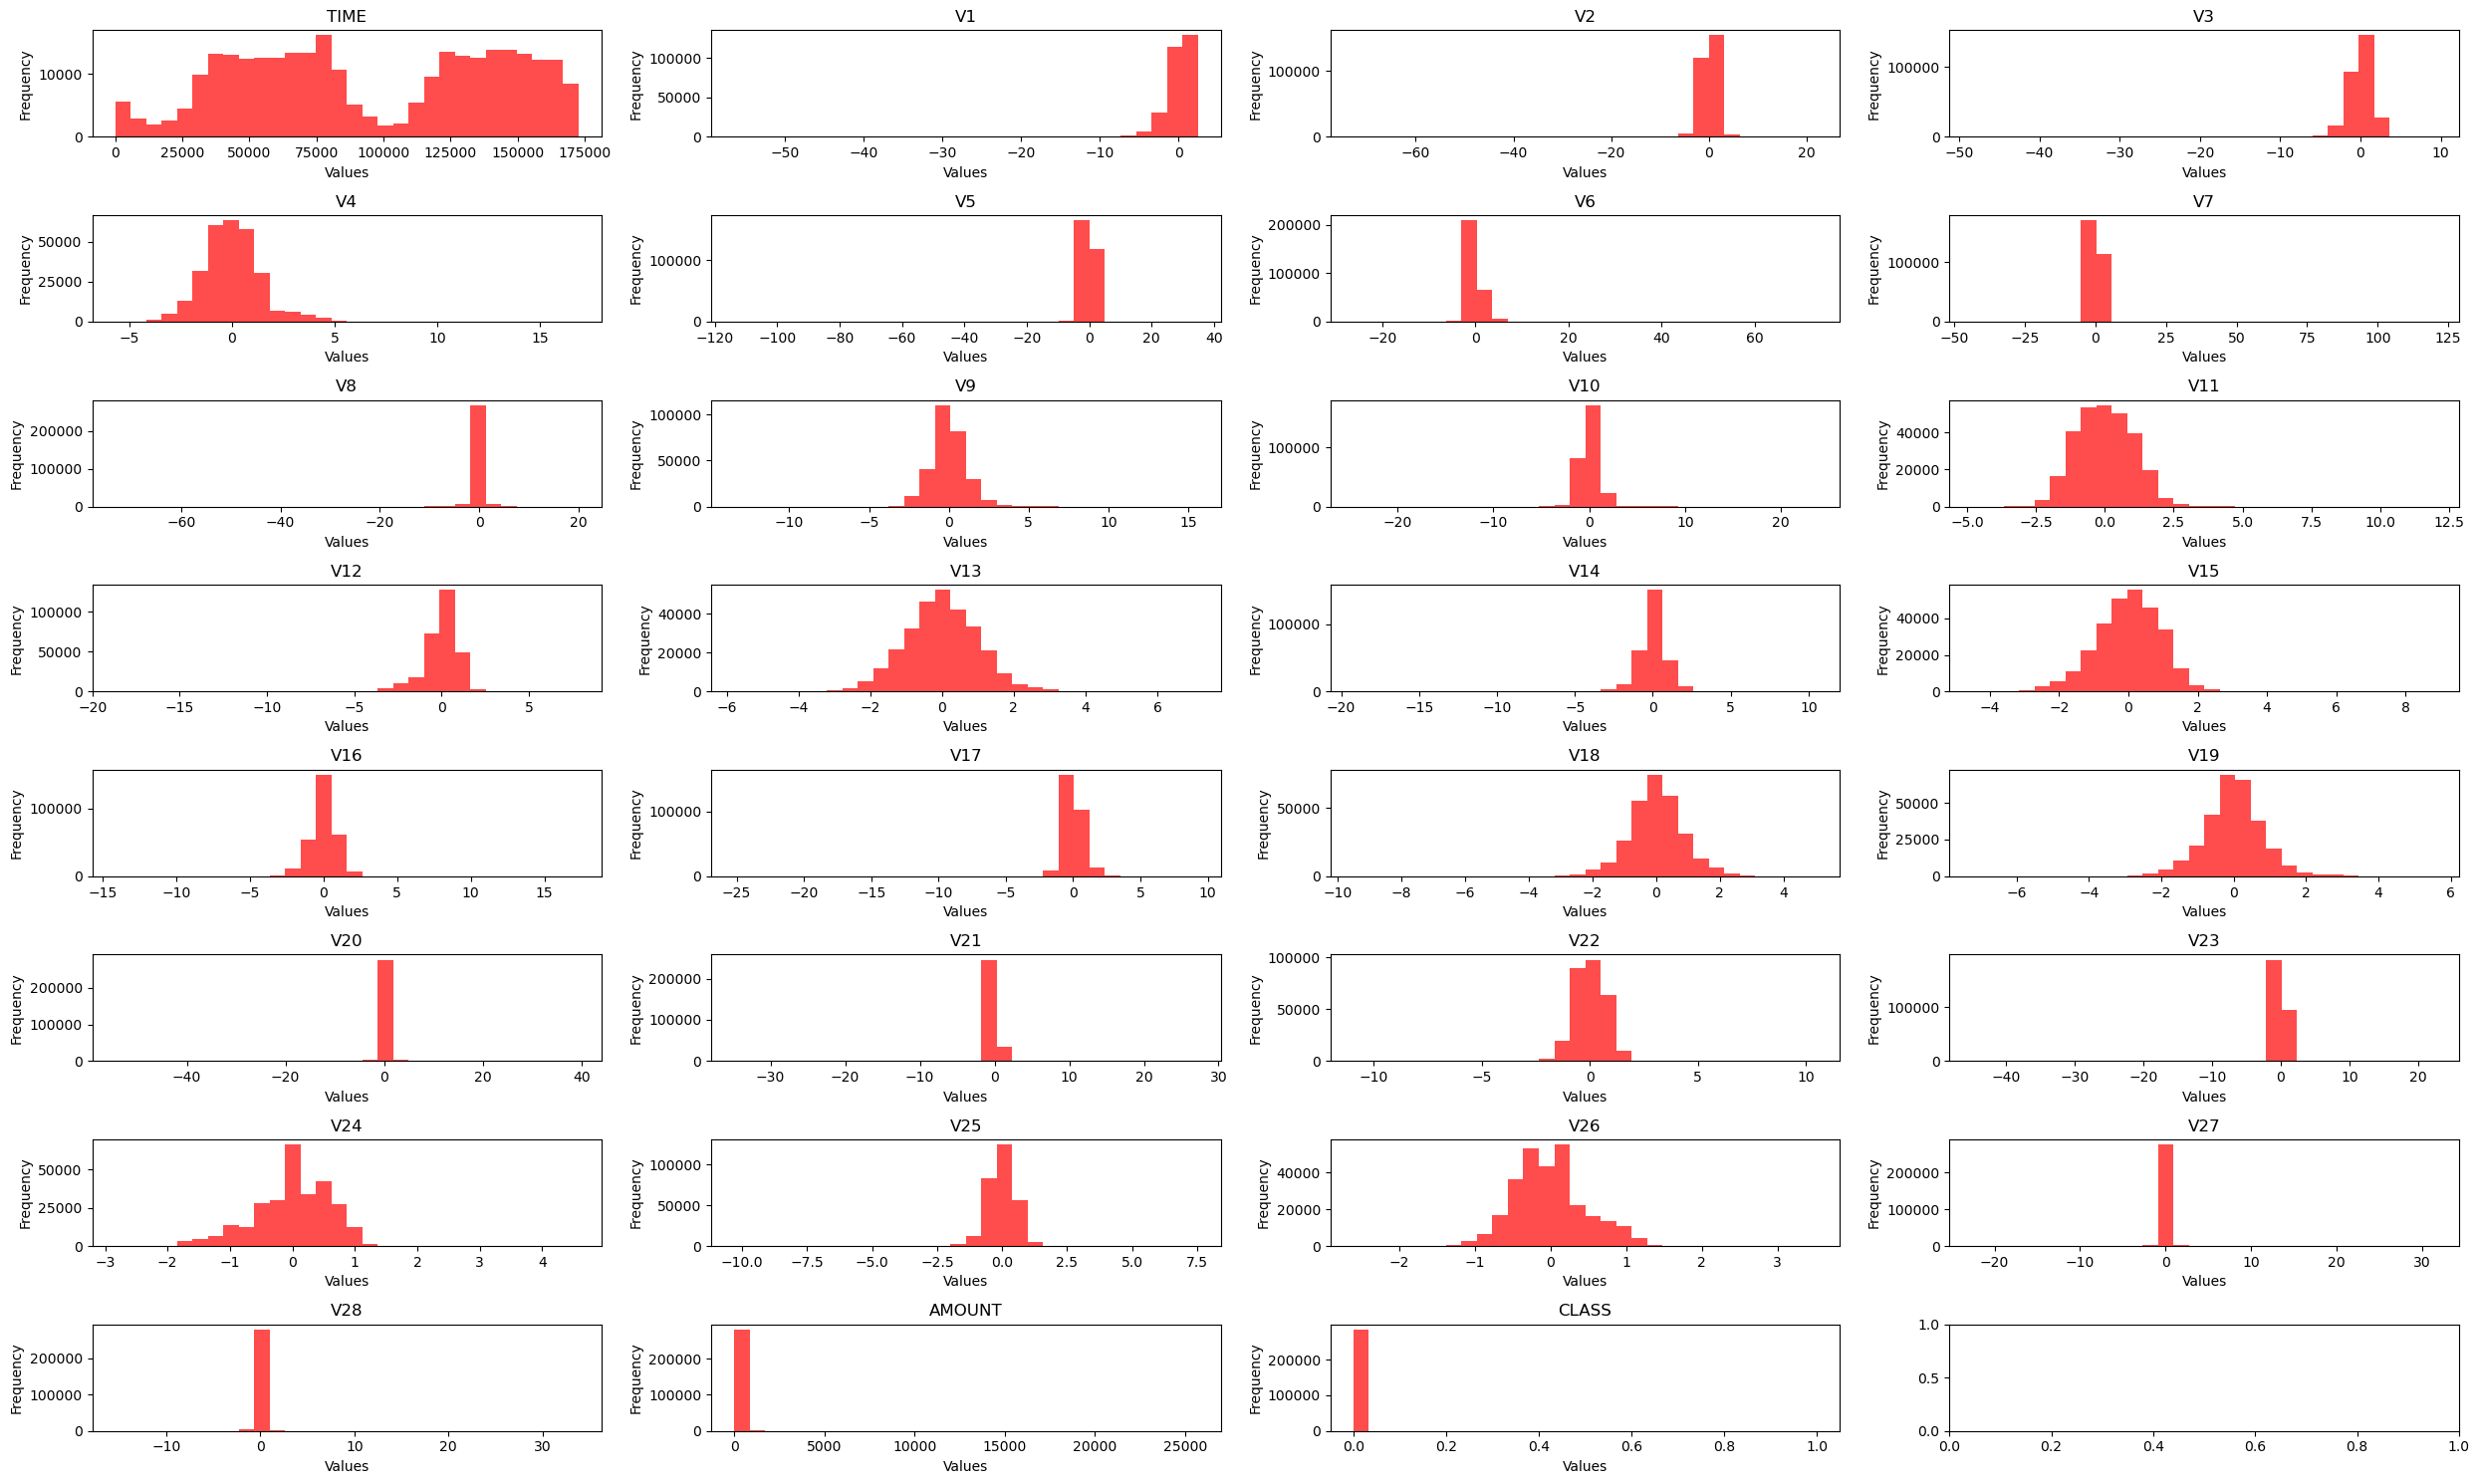

In [11]:
univariate_visualize_credit(creditcard)

Bivariate analysis

In [12]:
#bivarate(Fraud_Data)

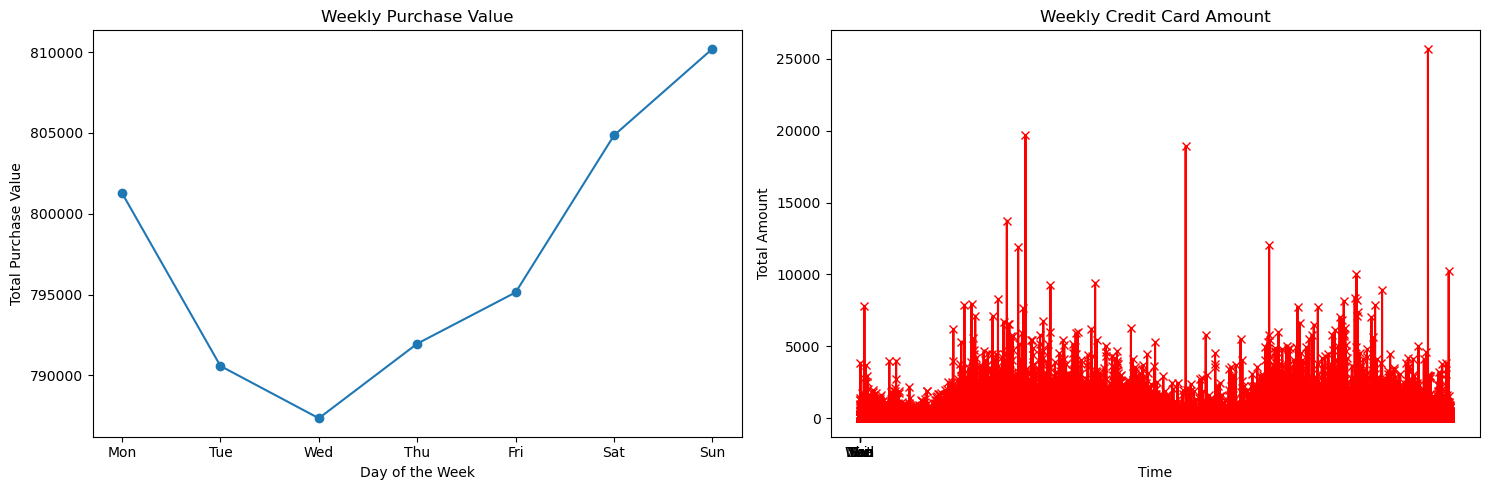

In [13]:
per(Fraud_Data,creditcard)

standardize and normalize

In [ ]:
df=standard_and_normalize(Fraud_Data)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,QVPSPJUOCKZAR,SEO,Chrome,M,0.362069,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,EOGFQPIZPYXFZ,Ads,Chrome,F,0.603448,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,YSSKYOSJHPPLJ,SEO,Opera,M,0.603448,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,ATGTXKYKUDUQN,SEO,Safari,M,0.396552,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,NAUITBZFJKHWW,Ads,Safari,M,0.465517,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,0.234483,XPSKTWGPWINLR,SEO,Chrome,M,0.172414,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,0.179310,LYSFABUCPCGBA,SEO,Safari,M,0.241379,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,0.213793,MEQHCSJUBRBFE,SEO,IE,F,0.137931,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,0.255172,CMCXFGRHYSTVJ,SEO,Chrome,M,0.327586,3.601175e+09,0


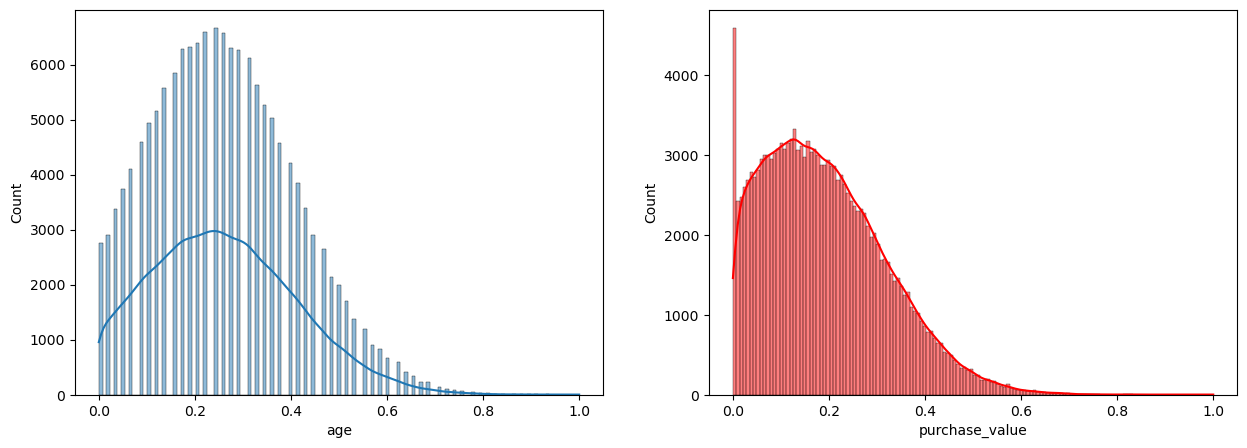

In [15]:
check_normality_and_standardize(df['age'],df['purchase_value'])

In [10]:
creditcard=normalize_and_standard(creditcard)

check normalize_and_standard for creditcard data

In [18]:
def check(data):
    numeric_columns=data.describe().columns.to_list()
    import matplotlib.pyplot as plt
    fig,axes=plt.subplots(8,4,figsize=(25,20))
    axes=axes.flatten()
    for i,column in enumerate(numeric_columns):
        axes[i-1].hist(data[column],bins=10)
        #axes[i-1].set_xtitle(column)
        

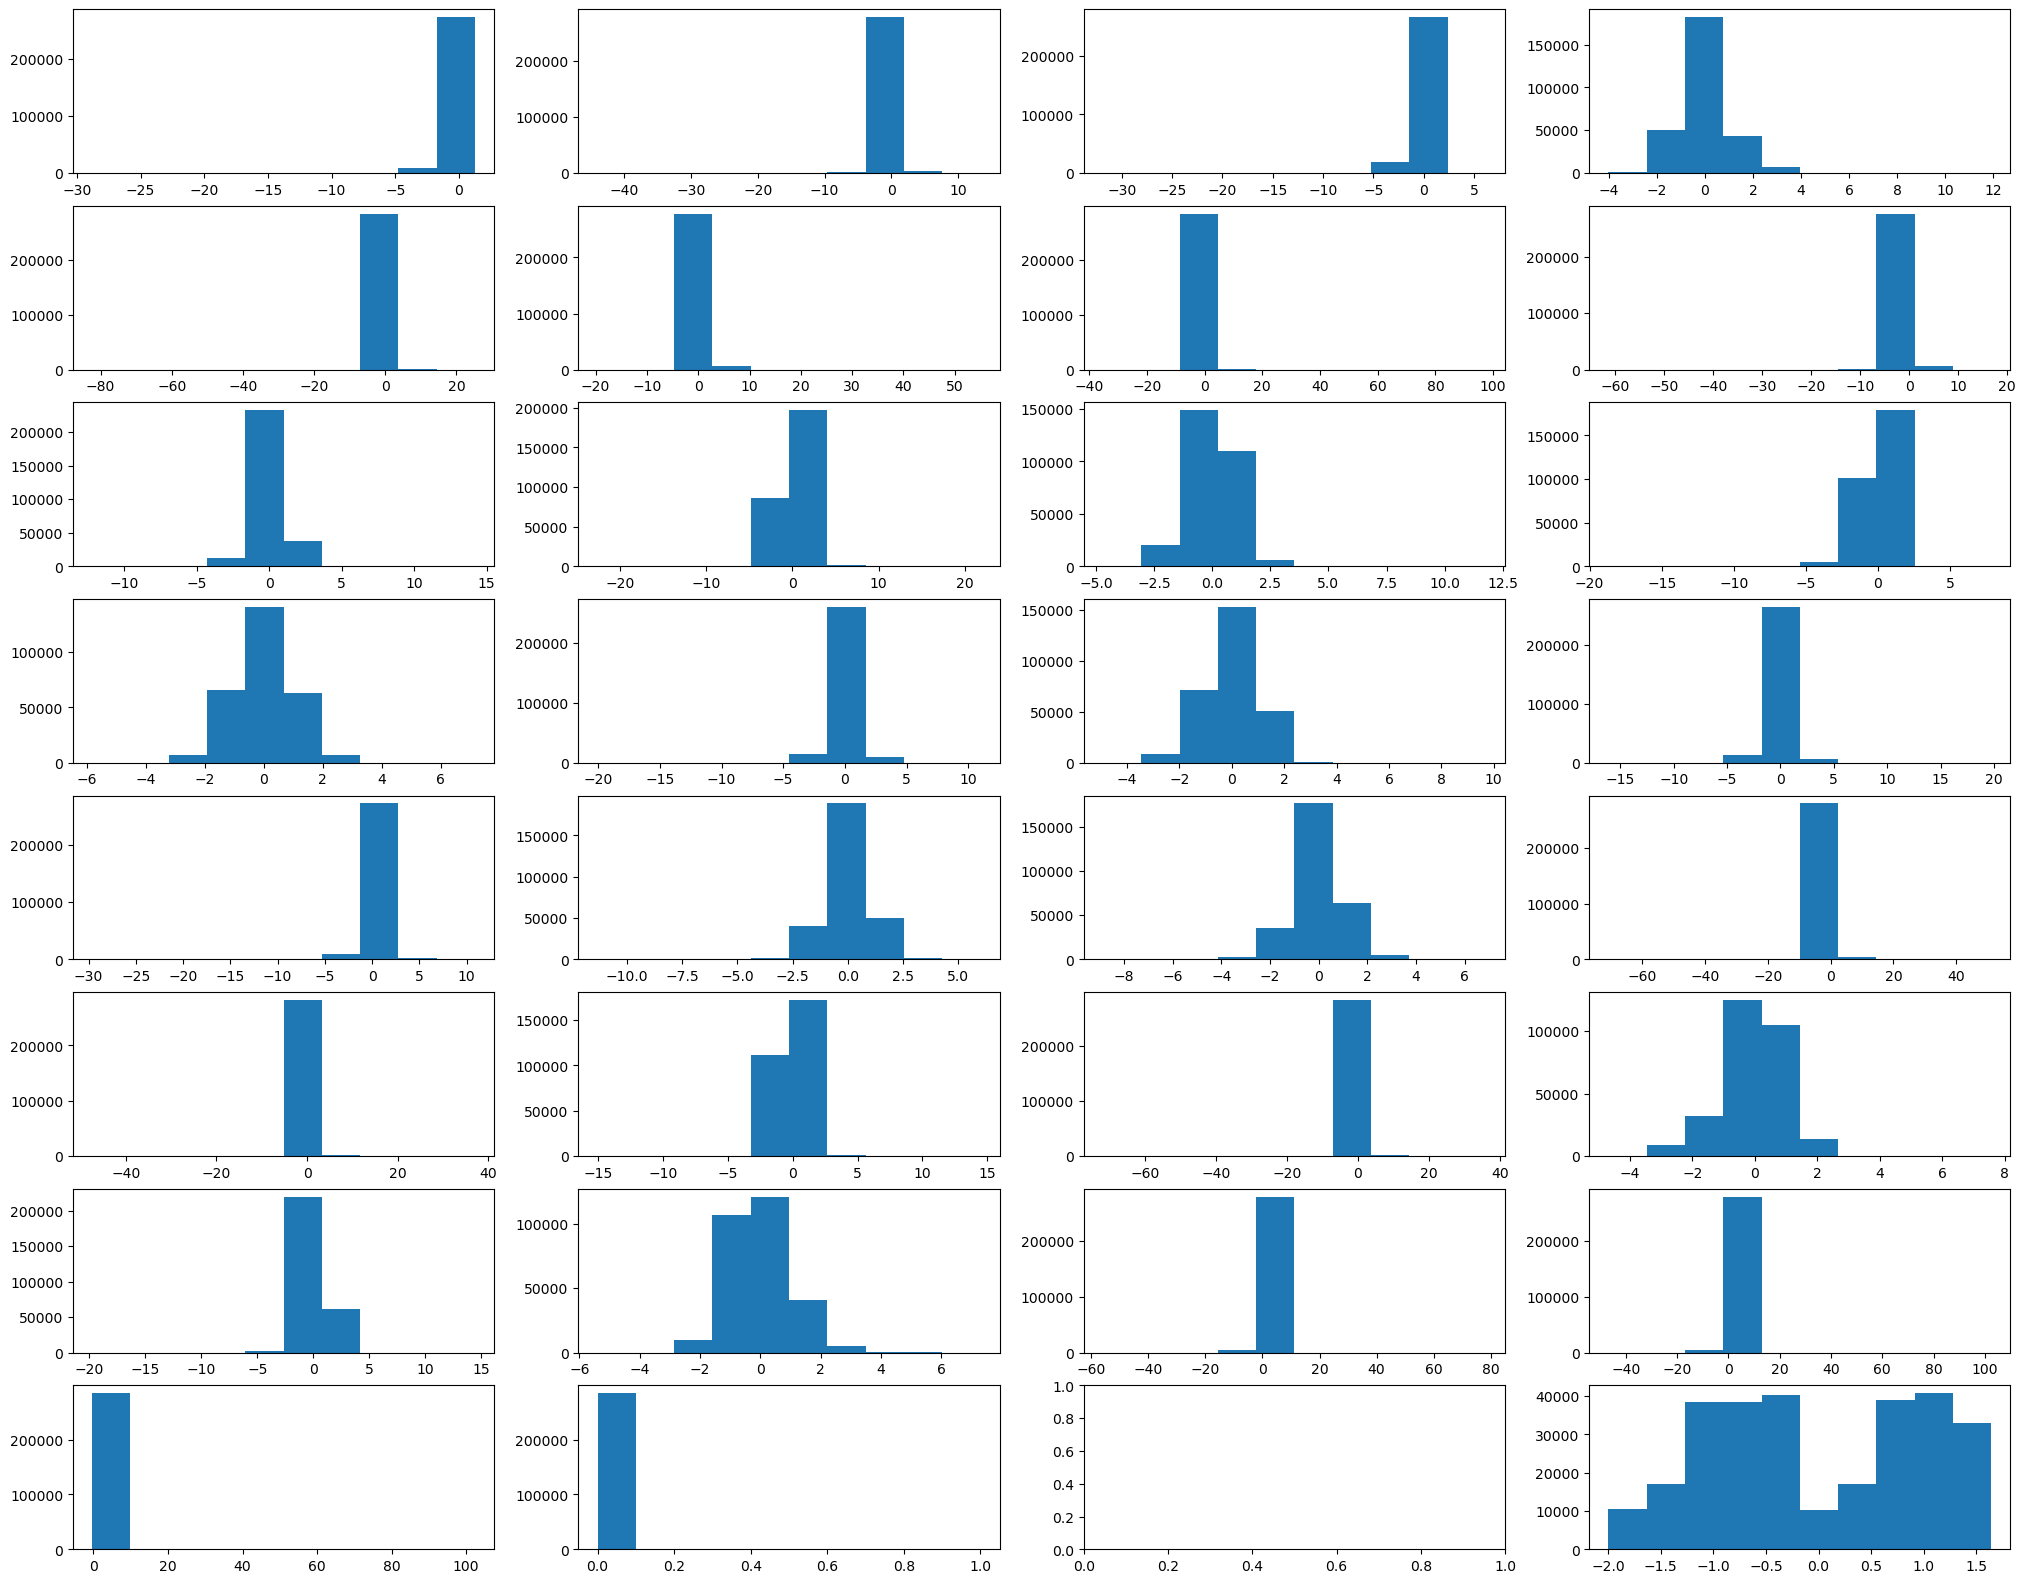

In [19]:
check(creditcard)

In [20]:
creditcard.to_csv(r'C:\Users\ASUS VIVO\Desktop\e-commerce\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\data\data\creditcard_final.csv')

In [ ]:
df=pd.get_dummies(columns=['source','browser','sex'] ,data=df)
creditcard=pd.get_dummies(columns=[])

In [20]:
df.to_csv(r'C:\Users\ASUS VIVO\Desktop\e-commerce\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\data\data\Fraud_data_1.csv')